In [5]:
import numpy as np
import math

In [72]:
def tanh(x):
    return np.tanh(x)
# 归一化指数函数
def softmax(x):
    exp = np.exp(x-x.max())
    return exp/exp.sum()


In [73]:
# 维度
demensions = [28*28,10]
# 激活函数，里面有两个
activation = [tanh, softmax]
# 表示第几层，每个字典代表一层
distribution = [
    {'b':[0,0]},
    {'b':[0,0] , 'w':[-math.sqrt(6/(demensions[0]+demensions[1])),math.sqrt(6/(demensions[0]+demensions[1]))]}
]
 

In [74]:
def init_parament_b(layer):
    dist = distribution[layer]['b']
    return np.random.rand(demensions[layer])*(dist[1]-dist[0])+dist[0]
def init_parament_w(layer):    
    dist = distribution[layer]['w']
    return np.random.rand(demensions[layer-1],demensions[layer])*(dist[1]-dist[0])+dist[0]

def init_parament():
    parameter = []
    for i in range(len(distribution)):
        layer_parement = {}
        for j in distribution[i].keys():
            if j=='b':
                layer_parement['b'] = init_parament_b(i)
                continue
            if j=='w':
                layer_parement['w'] = init_parament_w(i)
                continue
        parameter.append(layer_parement)
    return parameter

In [87]:

parameters = init_perement()
def predict(img,parameters):
    l0_in = img + parameters[0]['b']
    l0_out = activation[0](l0_in)
    l1_in = np.dot(l0_out , parameters[1]['w']) + parameters[1]['b']
    l1_out = activation[1](l1_in)
    return l1_out


In [96]:
predict(np.random.rand(784),parameters).argmax()

2

tanh函数的表示

![20200522145041](https://chendaxiashizhu-1259416116.cos.ap-beijing.myqcloud.com/20200522145041.png)

In [8]:
q = np.array([1,2,3,4])
q.max()

4

In [106]:
from pathlib import Path

In [109]:

dataset_path = Path('MNIST')
train_img_path = dataset_path/'train-images-idx3-ubyte'
train_lab_path = dataset_path/'train-labels-idx1-ubyte'
test_img_path = dataset_path/'t10k-images-idx3-ubyte'
test_lab_path = dataset_path/'t10k-labels-idx1-ubyte'


In [142]:
import struct
import matplotlib.pyplot as plt

In [138]:
with open(train_img_path,'rb') as f:
    struct.unpack('>4i',f.read(16))
    train_img = np.fromfile(f , dtype = np.uint8).reshape(-1,28*28)
with open(test_img_path,'rb') as f:
    struct.unpack('>4i',f.read(16))
    test_img = np.fromfile(f , dtype = np.uint8).reshape(-1,28*28)
with open(train_lab_path,'rb') as f:
    struct.unpack('>2i',f.read(8))
    train_lab = np.fromfile(f , dtype = np.uint8)
with open(test_lab_path,'rb') as f:
    struct.unpack('>2i',f.read(8))
    test_lab= np.fromfile(f , dtype = np.uint8)


In [152]:

def show_train(index):
    img = train_img[index].reshape(28,28)
    plt.imshow(img, cmap = 'gray')
    print('label:{}'.format(train_lab[index]))
def show_test(index):
    img = test_img[index].reshape(28,28)
    plt.imshow(img, cmap = 'gray')
    print('label:{}'.format(train_lab[index]))

label:4
label:1


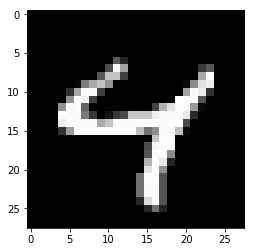

In [153]:
show_train(np.random.randint(60000))
show_test(np.random.randint(1000))

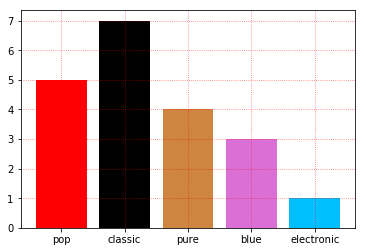

In [154]:
#关于bar()直方图
import matplotlib.pyplot as plt

x=[1,2,3,4,5]#确定柱状图数量,可以认为是x方向刻度
y=[5,7,4,3,1]#y方向刻度

color=['red','black','peru','orchid','deepskyblue']
x_label=['pop','classic','pure','blue','electronic']
plt.xticks(x, x_label)#绘制x刻度标签
plt.bar(x, y,color=color)#绘制y刻度标签  ✋稍后添加width参数，bottom参数，效果见图2

#设置网格刻度
plt.grid(True,linestyle=':',color='r',alpha=0.6)
plt.show()